# Logistic Regression Training

## Python Imports

In [42]:
import pickle

import numpy as np
from notebooks.utilities import data, ml_stats, sampling
from notebooks.utilities import train_test_split as tts
from notebooks.utilities import vectorize
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

## Load data

In [43]:
df = data.neutral()

In [44]:
df_sampled = sampling.undersample(df)

## Training Function

In [45]:
def logreg(X_train, y_train, X_test, name, C=10000000, solver="saga", max_iter=100):
    clf = LogisticRegression(
        C=C, random_state=13, solver=solver, max_iter=max_iter, n_jobs=-1
    )
    clf.fit(X_train, y_train.argmax(axis=1))
    pickle.dump(
        clf, open(f"../../models/neutral_models/{name}.pkl", "wb",),
    )
    return clf.predict(X_test), clf

## TF-IDF Vectorizer

### Vectorization

In [46]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "logreg", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  17.85
Length of vocabulary: 3005


### Train-Test Split

In [47]:
y = tts.encode_outputs(df_sampled["class"])

In [48]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [49]:
y_pred, model = logreg(X_train, y_train, X_test, "logreg_tfidf")

/Users/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Metrics

In [50]:
model.score(X_train, y_train.argmax(axis=1))

0.933233537084009

In [51]:
ml_stats.validation(y_test, y_pred)

0.9135111160392526
0.5875145534179742


In [52]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9394710634059976
Class 1 Accuracy: 0.8874444444444445


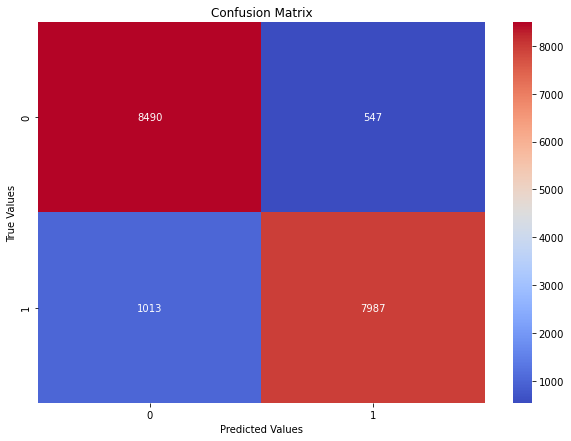

In [53]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [54]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.89      0.94      0.92      9037
     Class 1       0.94      0.89      0.91      9000

    accuracy                           0.91     18037
   macro avg       0.91      0.91      0.91     18037
weighted avg       0.91      0.91      0.91     18037



## Low TF-IDF Vectorizer

### Vectorization

In [55]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "l1_logreg", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  18.64
Length of vocabulary: 3005


### Train-Test Split

In [56]:
y = tts.encode_outputs(df_sampled["class"])

In [57]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [58]:
y_pred, model = logreg(X_train, y_train, X_test, "logreg_tfidf", C=1)

### Metrics

In [59]:
model.score(X_train, y_train.argmax(axis=1))

0.9201352793601951

In [60]:
ml_stats.validation(y_test, y_pred)

0.9101291789100183
0.5908964905472085


In [61]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9461104348788315
Class 1 Accuracy: 0.874


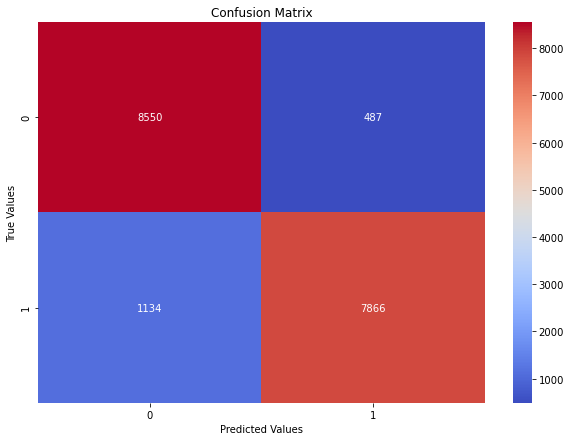

In [62]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [63]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.91

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

     Class 0       0.88      0.95      0.91      9037
     Class 1       0.94      0.87      0.91      9000

    accuracy                           0.91     18037
   macro avg       0.91      0.91      0.91     18037
weighted avg       0.91      0.91      0.91     18037



## Count Vectorizer

### Vectorization

In [64]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "logreg", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.18
Length of vocabulary: 3005


### Train-Test Split

In [65]:
y = tts.encode_outputs(df_sampled["class"])

In [66]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [67]:
y_pred, model = logreg(X_train, y_train, X_test, "logreg_tfidf")

/Users/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Metrics

In [68]:
model.score(X_train, y_train.argmax(axis=1))

0.8740488169986278

In [69]:
ml_stats.validation(y_test, y_pred)

0.8710428563508344
0.6299828131063924


In [70]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9352661281398694
Class 1 Accuracy: 0.8065555555555556


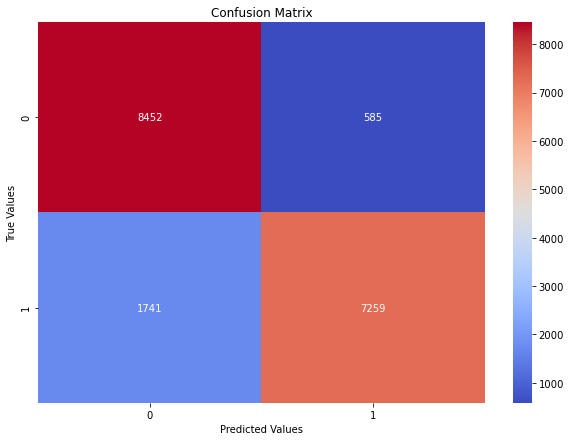

In [71]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [72]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.88
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.88
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

     Class 0       0.83      0.94      0.88      9037
     Class 1       0.93      0.81      0.86      9000

    accuracy                           0.87     18037
   macro avg       0.88      0.87      0.87     18037
weighted avg       0.88      0.87      0.87     18037



## Low Count Vectorizer

### Vectorization

In [73]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "l1_logreg", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  17.01
Length of vocabulary: 3005


### Train-Test Split

In [74]:
y = tts.encode_outputs(df_sampled["class"])

In [75]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [76]:
y_pred, model = logreg(X_train, y_train, X_test, "logreg_tfidf", C=1)

/Users/brandon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Metrics

In [77]:
model.score(X_train, y_train.argmax(axis=1))

0.8740210958182599

In [78]:
ml_stats.validation(y_test, y_pred)

0.8710982979431169
0.6299273715141099


In [79]:
ml_stats.class_accuracies(y_test, y_pred)

Class 0 Accuracy: 0.9353767843310833
Class 1 Accuracy: 0.8065555555555556


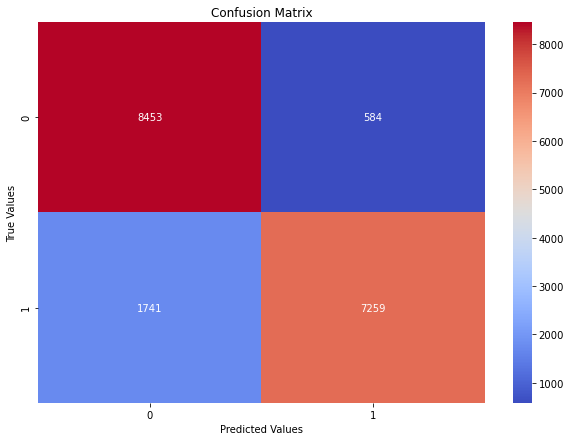

In [80]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [81]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.88
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.88
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

     Class 0       0.83      0.94      0.88      9037
     Class 1       0.93      0.81      0.86      9000

    accuracy                           0.87     18037
   macro avg       0.88      0.87      0.87     18037
weighted avg       0.88      0.87      0.87     18037

